In [2]:
import pprint as pp
import requests 
import eventregistry
import feedparser as fp
import json
from newsapi import NewsApiClient
from datetime import date
import datetime
import pandas as pd
import newspaper
from newspaper import Article
from time import mktime
from datetime import datetime, timedelta
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize.regexp import WhitespaceTokenizer
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob


[nltk_data] Downloading package punkt to /Users/hsaul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/hsaul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
newsapi = NewsApiClient(api_key='f513e29c94b844758f79311e9e081927')

all_articles = newsapi.get_everything(q='Coronavirus', 
                                      sources= 'msnbc',
                                      from_param='2020-03-14',
                                      to= '2020-04-09',
                                      language='en',
                                      sort_by='relevancy',
                                      page_size=100,
                                      page=1)




In [24]:
def get_sources(country):
    sources = newsapi.get_sources(country=country)
    sources = [x['id'] for x in sources['sources']]
    return sources

sources= get_sources(country='us')
print(sources[:200])


['abc-news', 'al-jazeera-english', 'ars-technica', 'associated-press', 'axios', 'bleacher-report', 'bloomberg', 'breitbart-news', 'business-insider', 'buzzfeed', 'cbs-news', 'cnbc', 'cnn', 'cnn-es', 'crypto-coins-news', 'engadget', 'entertainment-weekly', 'espn', 'espn-cric-info', 'fortune', 'fox-news', 'fox-sports', 'google-news', 'hacker-news', 'ign', 'mashable', 'medical-news-today', 'msnbc', 'mtv-news', 'national-geographic', 'national-review', 'nbc-news', 'new-scientist', 'newsweek', 'new-york-magazine', 'next-big-future', 'nfl-news', 'nhl-news', 'politico', 'polygon', 'recode', 'reddit-r-all', 'reuters', 'techcrunch', 'techradar', 'the-american-conservative', 'the-hill', 'the-huffington-post', 'the-next-web', 'the-verge', 'the-wall-street-journal', 'the-washington-post', 'the-washington-times', 'time', 'usa-today', 'vice-news', 'wired']


In [25]:
print(all_articles)

{'status': 'ok', 'totalResults': 932, 'articles': [{'source': {'id': 'msnbc', 'name': 'MSNBC'}, 'author': 'MSNBC.com', 'title': "Trump coronavirus task force briefing: 'One million tests have been conducted'", 'description': 'Pres. Trump holds coronavirus task force briefing; says America has hit a "historic milestone" having tested 1 million Americans for coronavirus.', 'url': 'https://www.msnbc.com/mtp-daily/watch/trump-coronavirus-task-force-briefing-one-million-tests-have-been-conducted-81393733866', 'urlToImage': 'https://media14.s-nbcnews.com/j/MSNBC/Components/Video/202003/n_mtpd_clip_trumppresser_200330_1920x1080.nbcnews-fp-1200-630.jpg', 'publishedAt': '2020-03-30T21:22:21Z', 'content': None}, {'source': {'id': 'msnbc', 'name': 'MSNBC'}, 'author': 'MSNBC.com', 'title': 'Quarantined Miami mayor on decision to hold Florida primary amid coronavirus', 'description': "Miami mayor Francis Suarez, who has tested positive for coronavirus, talks about his state's decision to hold prima

In [26]:
data= pd.DataFrame(all_articles['articles'])
data

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'msnbc', 'name': 'MSNBC'}",MSNBC.com,Trump coronavirus task force briefing: 'One mi...,Pres. Trump holds coronavirus task force brief...,https://www.msnbc.com/mtp-daily/watch/trump-co...,https://media14.s-nbcnews.com/j/MSNBC/Componen...,2020-03-30T21:22:21Z,None
1,"{'id': 'msnbc', 'name': 'MSNBC'}",MSNBC.com,Quarantined Miami mayor on decision to hold Fl...,"Miami mayor Francis Suarez, who has tested pos...",https://www.msnbc.com/msnbc/watch/quarantined-...,https://media14.s-nbcnews.com/j/MSNBC/Componen...,2020-03-18T01:01:59Z,None
2,"{'id': 'msnbc', 'name': 'MSNBC'}",MSNBC.com,Restaurant industry reeling from coronavirus,Despite the massive stimulus package the White...,https://www.msnbc.com/stephanie-ruhle/watch/re...,https://media14.s-nbcnews.com/j/MSNBC/Componen...,2020-03-19T14:36:46Z,None
3,"{'id': 'msnbc', 'name': 'MSNBC'}",MSNBC.com,New data on coronavirus vaccination,MSNBC’s Ali Velshi discusses the lack of coron...,https://www.msnbc.com/ali-velshi/watch/new-dat...,https://media13.s-nbcnews.com/j/MSNBC/Componen...,2020-03-14T15:18:15Z,None
4,"{'id': 'msnbc', 'name': 'MSNBC'}",MSNBC.com,Secrets to combating coronavirus stress,Many are grappling with additional stress and ...,https://www.msnbc.com/the-beat-with-ari/watch/...,https://media13.s-nbcnews.com/j/MSNBC/Componen...,2020-03-31T00:19:41Z,None
...,...,...,...,...,...,...,...,...
95,"{'id': 'msnbc', 'name': 'MSNBC'}",MSNBC.com,Bethenny Frankel raises over $17M for coronavi...,Entrepreneur & philanthropist Bethenny Frankel...,https://www.msnbc.com/craig-melvin/watch/bethe...,https://media11.s-nbcnews.com/j/MSNBC/Componen...,2020-04-09T15:52:53Z,None
96,"{'id': 'msnbc', 'name': 'MSNBC'}",MSNBC.com,How San Francisco got a jump start against cor...,San Francisco seemed to get a jump start again...,https://www.msnbc.com/stephanie-ruhle/watch/ho...,https://media13.s-nbcnews.com/j/MSNBC/Componen...,2020-04-07T15:06:36Z,None
97,"{'id': 'msnbc', 'name': 'MSNBC'}",MSNBC.com,Public health expert weighs in on possible cor...,"Dr. Joshua Sharfstein, Vice Dean for Public He...",https://www.msnbc.com/andrea-mitchell-reports/...,https://media13.s-nbcnews.com/j/MSNBC/Componen...,2020-03-25T19:20:59Z,None
98,"{'id': 'msnbc', 'name': 'MSNBC'}",None,Trump campaign threatens legal action of coron...,The president's re-election campaign is threat...,http://www.msnbc.com/morning-joe/watch/trump-c...,None,2020-03-26T10:50:15Z,None


In [27]:
data_list=  all_articles['articles']
key_words_100=[]
for data in all_articles['articles']:
    art = Article(url=data['url'])
    art.download()
    art.parse()
    art.nlp()
    key_words_100.append(art.keywords)


In [85]:
key_words_100

[['conducted',
  'coronavirus',
  'force',
  'tough',
  'state',
  'ohio',
  'reopening',
  'closing',
  'governor',
  'million',
  'briefing',
  'tests',
  'task',
  'trump'],
 ['coronavirus',
  'decision',
  'miami',
  'pandemic',
  'hold',
  'quarantined',
  'florida',
  'amid',
  'mayor',
  'tested',
  'suarez',
  'primary',
  'talks',
  'states',
  'primaries',
  'positive'],
 ['coronavirus',
  'ruhle',
  'ross',
  'weighing',
  'reeling',
  'stimulus',
  'restaurant',
  'struggling',
  'white',
  'sorkin',
  'small',
  'stephanie',
  'industry'],
 ['coronavirus',
  'velshi',
  'process',
  'united',
  'lack',
  'vaccination',
  'data',
  'tests',
  'states',
  'finding',
  'discusses',
  'vaccine',
  'msnbcs'],
 ['right',
  'coronavirus',
  'tony',
  'project',
  'rimoin',
  'stress',
  'schwartz',
  'pandemic',
  'combating',
  'ucla',
  'specific',
  'secrets',
  'msnbcs'],
 ['coronavirus',
  'history',
  'scope',
  'public',
  'severity',
  'downplaying',
  'pandemic',
  'pres

In [28]:
urls=[]
for data in all_articles['articles']:
    url=data['url']
    urls.append(url)


In [31]:
urls


['https://www.msnbc.com/mtp-daily/watch/trump-coronavirus-task-force-briefing-one-million-tests-have-been-conducted-81393733866',
 'https://www.msnbc.com/msnbc/watch/quarantined-miami-mayor-on-decision-to-hold-florida-primary-amid-coronavirus-80888389825',
 'https://www.msnbc.com/stephanie-ruhle/watch/restaurant-industry-reeling-from-coronavirus-80967237571',
 'https://www.msnbc.com/ali-velshi/watch/new-data-on-coronavirus-vaccination-80666693884',
 'https://www.msnbc.com/the-beat-with-ari/watch/secrets-to-combating-coronavirus-stress-81401925515',
 'https://www.msnbc.com/deadline-white-house/watch/trump-s-revisionist-history-on-coronavirus-81503301907',
 'https://www.msnbc.com/ali-velshi/watch/delaying-primaries-due-to-coronavirus-80683589921',
 'https://www.msnbc.com/msnbc/watch/mcconnell-says-congress-has-enormous-role-to-play-in-coronavirus-response-80914501889',
 'https://www.msnbc.com/msnbc/watch/fed-cuts-interest-rates-and-trump-is-very-happy-80691269804',
 'https://www.msnbc.co

In [58]:
source_list=[]
for data in all_articles['articles']:
    source=data['source']
    source_list.append(source)

In [77]:
date_list=[]
for data in all_articles['articles']:
    date=data['publishedAt']
    date_list.append(Date)

In [61]:
title_list=[]
for date in all_articles['articles']:
    title=data['title']
    title_list.append(title)

In [62]:
urls_list=[]
for data in all_articles['articles']:
    url=data['url']
    urls_list.append(url)

In [71]:
key_words_list=[]
for data in all_articles['articles']:
    art = Article(url=data['url'])
    art.download()
    art.parse()
    art.nlp()
    key_words_list.append(art.keywords)

In [64]:
text_list=[]
for data in all_articles['articles']:
    art = Article(url=data['url'])
    art.download()
    art.parse()
    art.nlp()
    text_list.append(art.text)

In [86]:
type(art)

newspaper.article.Article

In [79]:
article_df = pd.DataFrame(list(zip(source_list, date_list, title_list, urls_list, key_words_list, text_list)), 
               columns =['Source', 'Date', 'Title','URL','Keywords','Text']) 
article_df

,Source,Date,Title,URL,Keywords,Text
0,"{'id': 'msnbc', 'name': 'MSNBC'}",2020-03-23T20:44:17Z,Democrats hold coronavirus stimulus over trans...,https://www.msnbc.com/mtp-daily/watch/trump-co...,"[conducted, coronavirus, governors, cuomo, for...",Cuomo: Governors are in charge because Trump p...
1,"{'id': 'msnbc', 'name': 'MSNBC'}",2020-03-23T20:44:17Z,Democrats hold coronavirus stimulus over trans...,https://www.msnbc.com/msnbc/watch/quarantined-...,"[coronavirus, decision, miami, pandemic, hold,...","Miami mayor Francis Suarez, who has tested pos..."
2,"{'id': 'msnbc', 'name': 'MSNBC'}",2020-03-23T20:44:17Z,Democrats hold coronavirus stimulus over trans...,https://www.msnbc.com/stephanie-ruhle/watch/re...,"[coronavirus, ruhle, ross, weighing, reeling, ...",Despite the massive stimulus package the White...
3,"{'id': 'msnbc', 'name': 'MSNBC'}",2020-03-23T20:44:17Z,Democrats hold coronavirus stimulus over trans...,https://www.msnbc.com/ali-velshi/watch/new-dat...,"[coronavirus, velshi, process, united, lack, v...",MSNBC’s Ali Velshi discusses the lack of coron...
4,"{'id': 'msnbc', 'name': 'MSNBC'}",2020-03-23T20:44:17Z,Democrats hold coronavirus stimulus over trans...,https://www.msnbc.com/the-beat-with-ari/watch/...,"[right, coronavirus, tony, project, rimoin, st...",Many are grappling with additional stress and ...
...,...,...,...,...,...,...
95,"{'id': 'msnbc', 'name': 'MSNBC'}",2020-03-23T20:44:17Z,Democrats hold coronavirus stimulus over trans...,https://www.msnbc.com/craig-melvin/watch/bethe...,"[frankel, coronavirus, bethenny, 17m, raises, ...",Entrepreneur & philanthropist Bethenny Frankel...
96,"{'id': 'msnbc', 'name': 'MSNBC'}",2020-03-23T20:44:17Z,Democrats hold coronavirus stimulus over trans...,https://www.msnbc.com/stephanie-ruhle/watch/ho...,"[coronavirus, rest, start, ruhle, francisco, j...",San Francisco seemed to get a jump start again...
97,"{'id': 'msnbc', 'name': 'MSNBC'}",2020-03-23T20:44:17Z,Democrats hold coronavirus stimulus over trans...,https://www.msnbc.com/andrea-mitchell-reports/...,"[coronavirus, therapeutic, researchers, treatm...","Dr. Joshua Sharfstein, Vice Dean for Public He..."
98,"{'id': 'msnbc', 'name': 'MSNBC'}",2020-03-23T20:44:17Z,Democrats hold coronavirus stimulus over trans...,http://www.msnbc.com/morning-joe/watch/trump-c...,"[legal, coronavirus, action, trump, ad, threat...",The president's re-election campaign is threat...


In [80]:
article_df.to_csv(r'COVID-news\msnbc.csv',index=False)

In [30]:
pol_score = []
sub_score=[]

for i in range(len(urls)):

    art = Article(url=urls[i])
    art.download()
    art.parse()
    pol_score.append(TextBlob(art.text).sentiment.polarity)
    sub_score.append(TextBlob(art.text).sentiment.subjectivity)
    
    
    
    
    
df = pd.DataFrame(list(zip(pol_score,sub_score)), columns = ['polarity', 'subjectivity'])     
    
    
    
    


In [32]:
df

,polarity,subjectivity
0,-0.388889,0.833333
1,0.227273,0.545455
2,-0.034259,0.314815
3,0.000000,0.000000
4,0.261905,0.386905
...,...,...
95,-0.062500,0.187500
96,0.000000,0.000000
97,0.050000,0.233333
98,0.100000,0.433333


(array([23., 11.,  9., 12., 15.,  8.,  1.,  2., 14.,  5.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

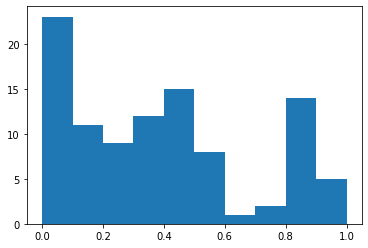

In [33]:
plt.hist(df['subjectivity'])

(array([14.,  4., 35., 20., 15.,  3.,  6.,  1.,  0.,  2.]),
 array([-0.39583333, -0.25625   , -0.11666667,  0.02291667,  0.1625    ,
         0.30208333,  0.44166667,  0.58125   ,  0.72083333,  0.86041667,
         1.        ]),
 <a list of 10 Patch objects>)

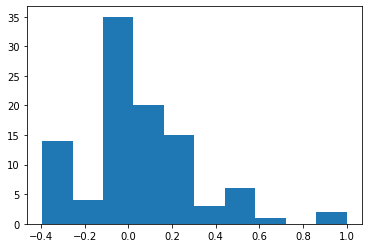

In [34]:
plt.hist(df['polarity'])

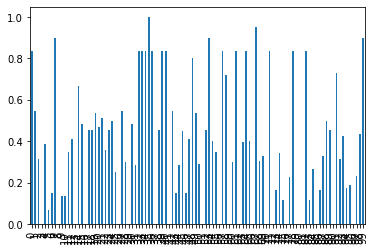

In [35]:
df['subjectivity'].plot.bar()

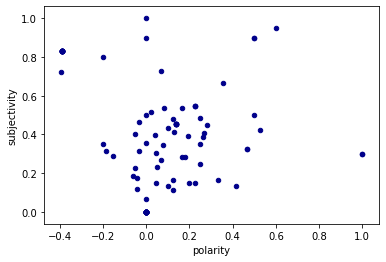

In [36]:
df.plot.scatter(x='polarity',
...             y='subjectivity',
...             c='DarkBlue')

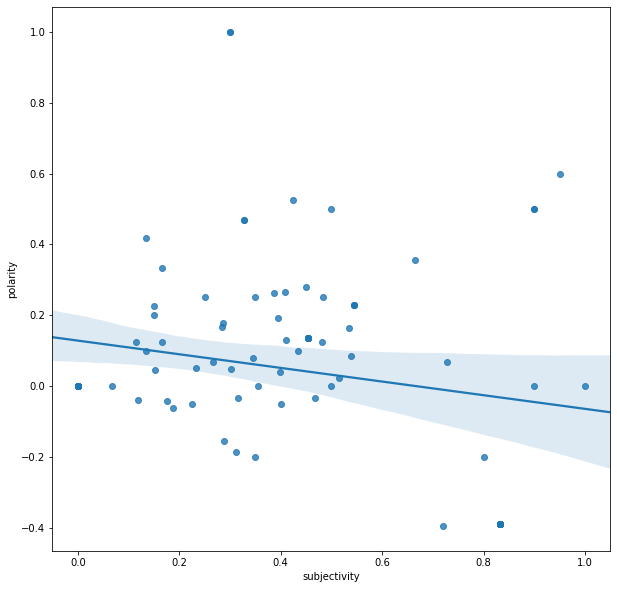

In [47]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.regplot('subjectivity', 'polarity', data=df)

In [48]:
df.describe()

,polarity,subjectivity
count,100.000000,100.000000
mean,0.055532,0.376176
std,0.269796,0.300504
min,-0.395833,0.000000
25%,-0.008333,0.129630
50%,0.000000,0.350000
75%,0.169643,0.540341
max,1.000000,1.000000


In [70]:
key_words_100

[['5g', 'dangers', 'wrote', 'twitter', 'claimed', 'star', 'networks', 'john', 'coronavirus', 'theory', 'cusack', 'actor', 'tweets', 'deletes', 'conspiracy', 'views'], ['liverpool', '5g', 'torched', 'birmingham', 'towers', 'cell', 'videos', 'uks', 'working', 'bizarre', 'coronavirus', 'theory', 'links', 'uk', 'conspiracy', 'pandemic', 'tweeted'], ['5g', 'sharing', 'woody', 'towers', 'latest', 'star', 'theories', 'spread', 'signals', 'coronavirus', 'tied', 'uk', 'conspiracy', 'pandemic', 'harrelson'], ['rethink', 'olympics', '2019', 'world', 'forces', 'grant', 'imports', 'economic', 'clear', 'coronavirus', 'trade', 'china', 'relationship', 'chinas', 'reboot', 'communist', 'rebecca'], ['dioxide', 'uc', 'lead', 'impacting', 'pollution', 'nitrogen', 'emissions', 'globe', 'coronavirus', 'nasa', 'levels', 'no2', 'ozone'], ['covid19', 'patients', 'drones', 'ventilators', 'apps', 'fight', 'tech', 'coronavirus', 'valves', 'used', 'using', 'pandemic', 'smartphone', 'helmets'], ['cloud', 'united', 

In [71]:
key_words_100
flat_list = [item for sublist in key_words_100 for item in sublist]

In [57]:
STOPWORDS.add('coronavirus ')
STOPWORDS.add(' coronavirus')
STOPWORDS.add('corona')
STOPWORDS.add('Coronavirus')
STOPWORDS.add(' Coronavirus')
STOPWORDS.add('Coronavirus')
STOPWORDS.add(' Coronavirus ')
STOPWORDS.add(' coronavirus ')
STOPWORDS.add('Corona')
STOPWORDS.add('covid19')
STOPWORDS.add('COVID19')
STOPWORDS.add('virus')



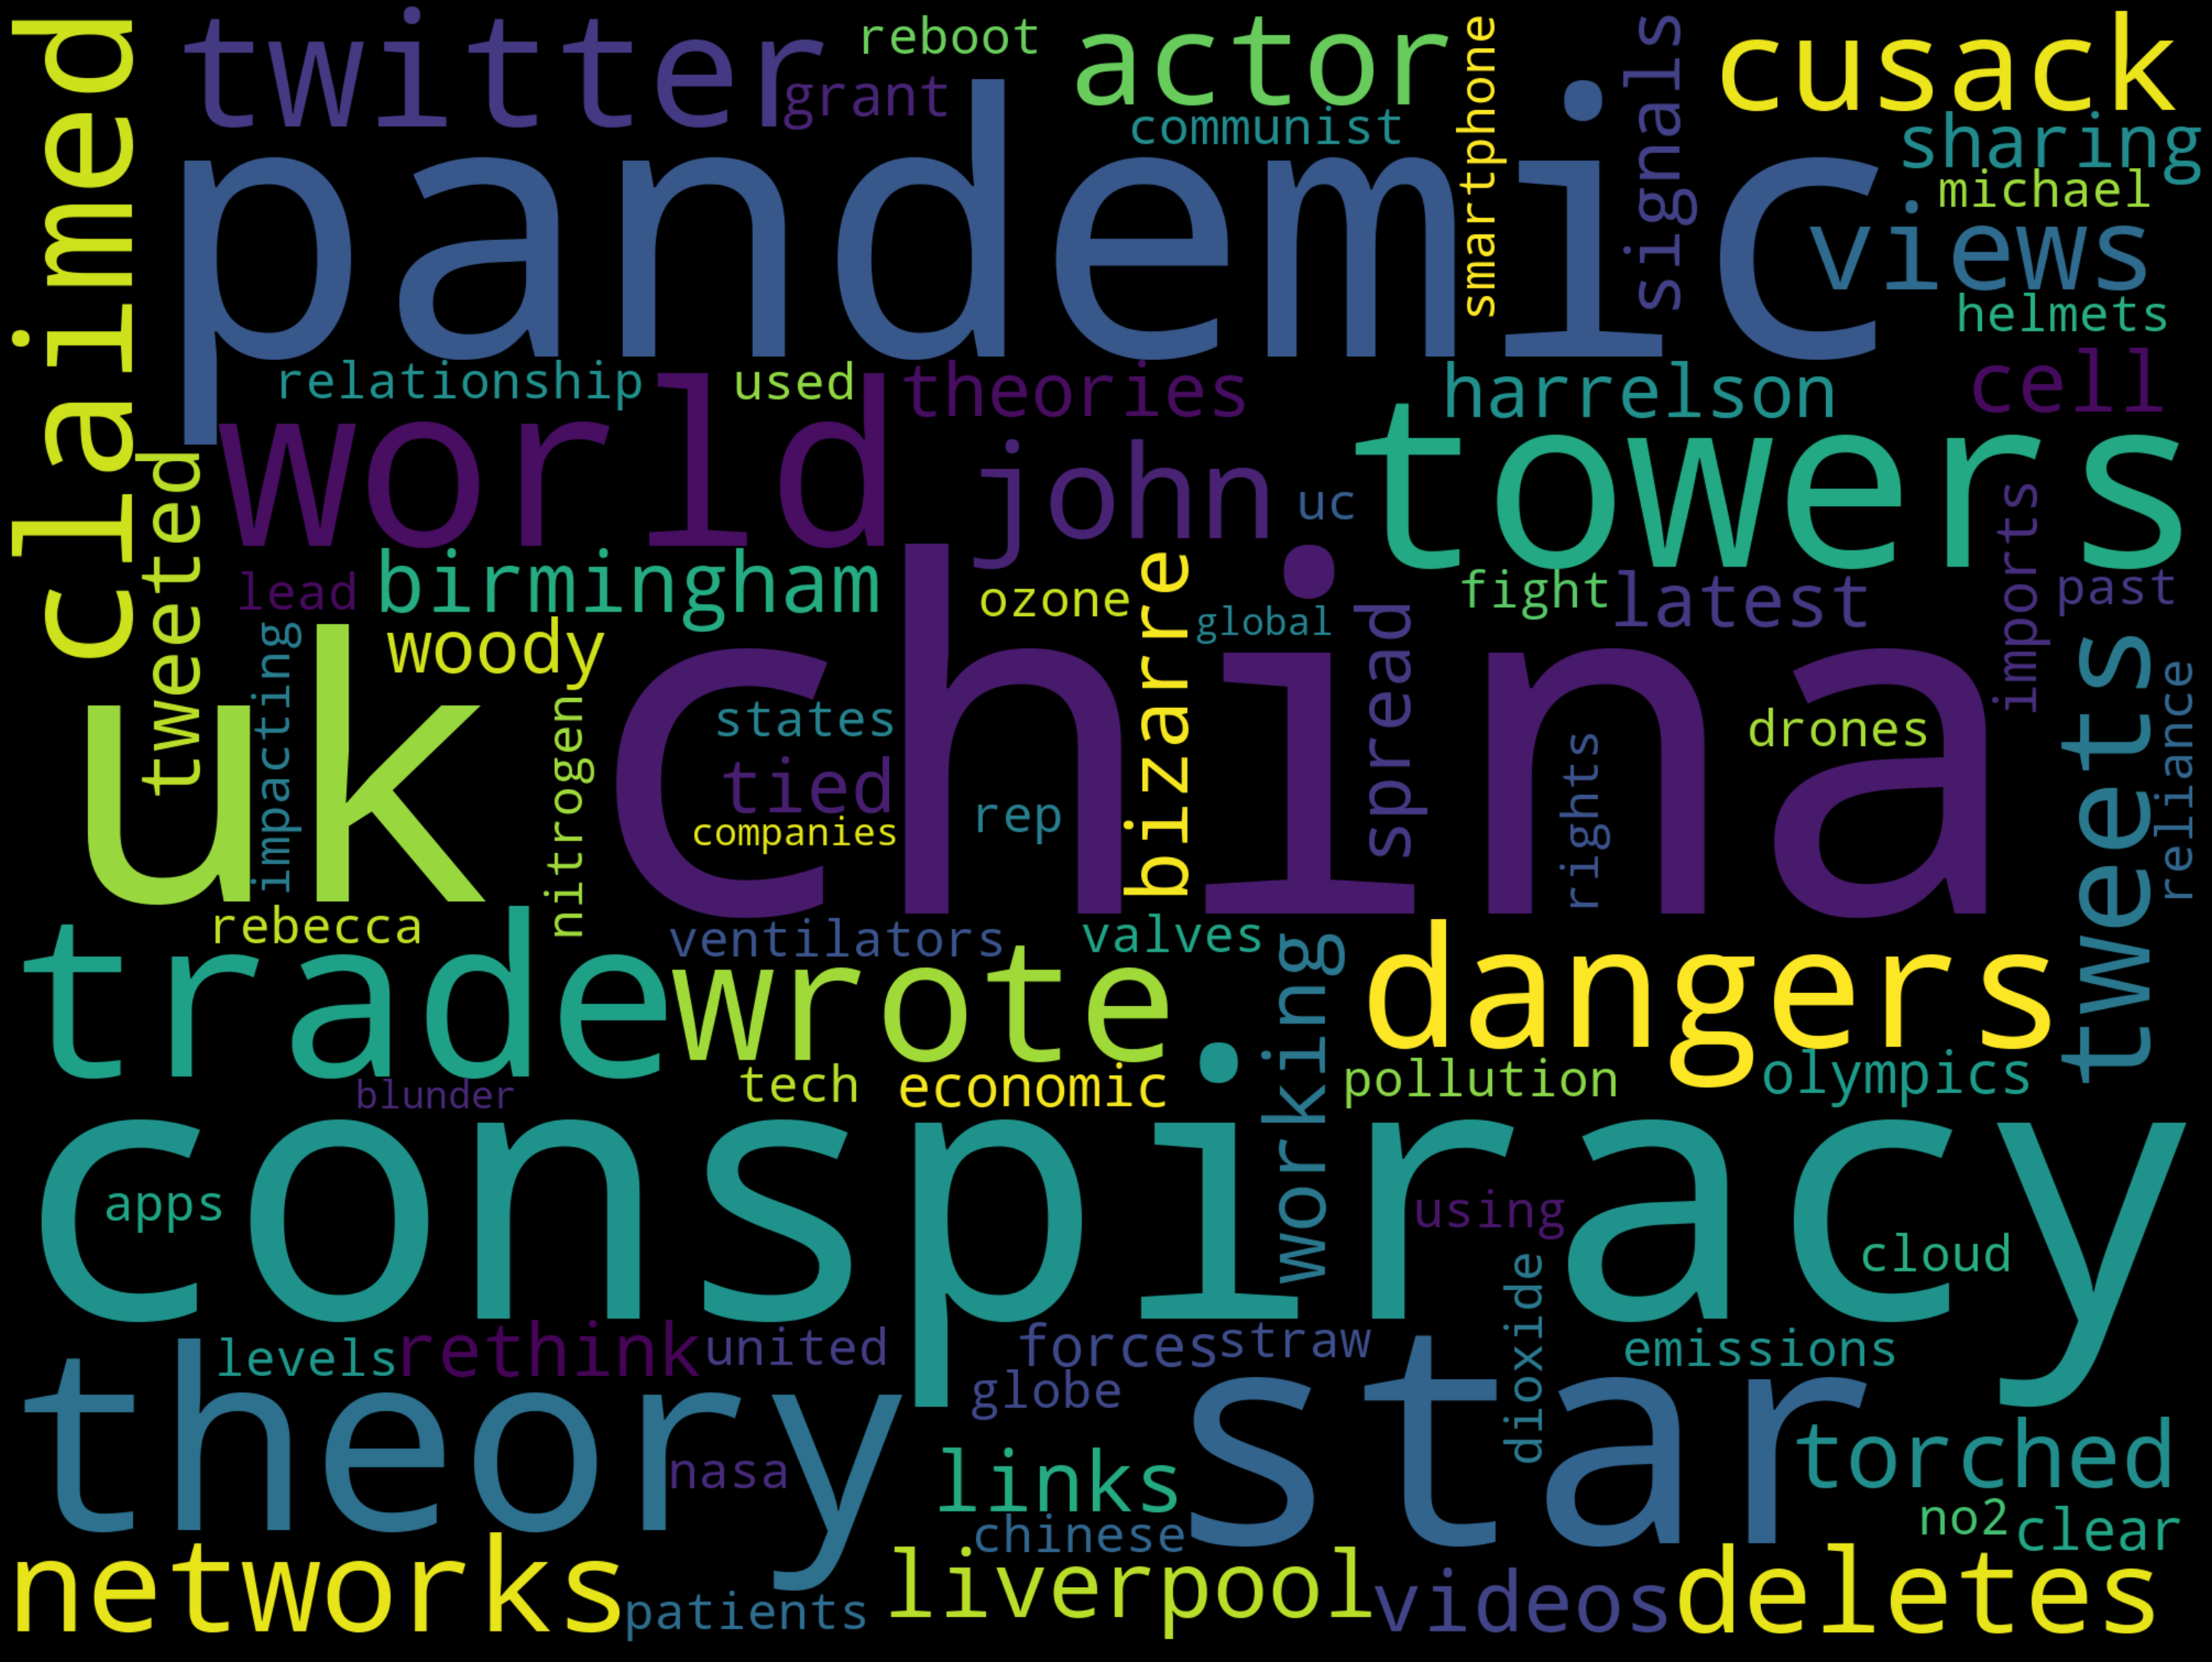

In [74]:
text = " ".join(flat_list)
wordcloud = WordCloud(
    width = 2000,
    height = 1500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [3]:
data = pd.read_csv("WordCounts_clean.csv")

In [6]:
data

,Unnamed: 0,Reuters,NYTimes,Fox News,Total
0,"china,",119.0,64.0,86.0,269.0
1,"case,",75.0,53.0,61.0,189.0
2,"trump,",26.0,52.0,85.0,163.0
3,"outbreak,",69.0,25.0,67.0,161.0
4,"health,",65.0,31.0,62.0,158.0
...,...,...,...,...,...
209,NaN,NaN,NaN,NaN,NaN
210,NaN,NaN,NaN,NaN,NaN
211,NaN,NaN,NaN,NaN,NaN
212,NaN,NaN,NaN,NaN,NaN


In [7]:
data.to_json(r'word_counts.json')

In [8]:
import json
from pymongo import MongoClient

client = MongoClient('localhost', 27017)
db = client['pro3news']
collection= db['keywords']

with open('word_counts.json') as g:
    file_data = json.load(g)

# if pymongo >= 3.0 use insert_one() for inserting one document
collection.insert_one(file_data)


client.close()